## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
data = pd.read_csv("medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Whatis tha average BMI of indivuals grouped by their sex?


In [3]:
avg_bmi = data.pivot_table(index='sex', values='bmi',aggfunc='mean')
avg_bmi

,bmi
sex,
female,30.434473
male,30.960633


##  2. How does the average age vary for smokers and non-smokers


In [4]:
avg_age_smoker = data.pivot_table(index='smoker', values='age',aggfunc='mean')
avg_age_smoker

,age
smoker,
no,39.275362
yes,38.460993


##  3. What is the total number of the children for each region
 

In [5]:
total_noOf_childern_region = data.pivot_table(index='region', values='children',aggfunc='count')
total_noOf_childern_region

,children
region,
northeast,658
northwest,664
southeast,766
southwest,684


## 4. What is the total number of males and females in each region


In [6]:
total_noOf_maleFemale_region = data.pivot_table(index='region', values='sex',aggfunc='count')
total_noOf_maleFemale_region

,sex
region,
northeast,658
northwest,664
southeast,766
southwest,684


##  5. What is average age of individuals gruoped by their BMI category


In [7]:
avg_age_individual = data.pivot_table(index='bmi',values='age', aggfunc='mean')
avg_age_individual

,age
bmi,
15.960,18.000000
16.815,29.500000
17.195,26.000000
17.290,27.666667
17.385,23.000000
...,...
48.070,46.000000
49.060,58.000000
50.380,23.000000


##  6. How does the average insurance charge change with an increase in the number of chidern 


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
avg_insurance = data.pivot_table(index='children', values='charges', aggfunc='mean')
avg_insurance

,charges
children,
0,12317.920881
1,12722.650521
2,15268.182723
3,15304.070620
4,13550.983876
5,8706.036629


##  7. What is the maximum charge by region?


In [10]:
max_charge_by_region = data.pivot_table(index='region',values='charges', aggfunc='max')
max_charge_by_region

,charges
region,
northeast,58571.07448
northwest,60021.39897
southeast,63770.42801
southwest,52590.82939


##  8.How many smokers are there in each region


In [11]:
total_smoker_in_each_region = data.pivot_table(index='region', values='smoker', aggfunc='count')
total_smoker_in_each_region

,smoker
region,
northeast,658
northwest,664
southeast,766
southwest,684


##  9.What is the average charge for smokers and non-smokers


In [12]:
melted_df = data.melt(id_vars='smoker', value_vars='charges', var_name='charges', value_name='Amount')
average_charge = melted_df.groupby('smoker')['Amount'].mean()
average_charge

smoker
no      8417.874411
yes    32223.139764
Name: Amount, dtype: float64

##  10. How many unique regions are there in the dataset?

In [13]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Basic Checks 

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [16]:
data.shape

(2772, 7)

In [17]:
data.size

19404

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [19]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.describe(include='O')

,sex,smoker,region
count,2772,2772,2772
unique,2,2,4
top,male,no,southeast
freq,1406,2208,766


## Data PreProcessing

In [21]:
# Check missing value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
# Handle Categorical Data Using Map and frequency encoding
data.select_dtypes('object').head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [23]:
# USe mannual encoding for the sex
data.sex.value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

In [24]:
# USe mannual encoding for the smoker
data.sex = data.sex.map({"male":1, "female":0})

In [25]:
data.smoker.value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [26]:
data.smoker = data.smoker.map({"yes":1, "no":0})

In [27]:
# Use frequancy encoding for the region
data.region.value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [28]:
data.loc[data['region'] == "southeast", "region"] = 3
data.loc[data['region'] == "southwest", "region"] = 2
data.loc[data['region'] == "northwest", "region"] = 1
data.loc[data['region'] == "northeast", "region"] = 0

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


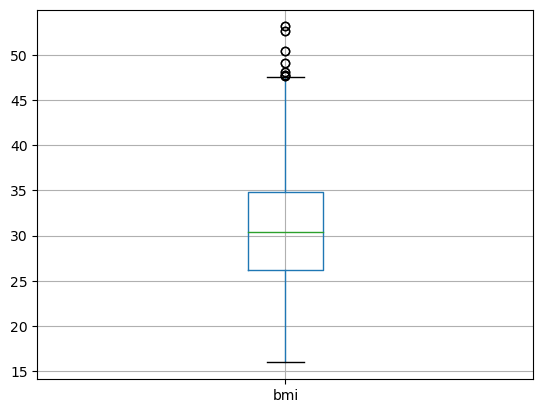

In [30]:
# Check outlier in age, bmi
data.boxplot('bmi')
plt.show()

* Some Outlier present in the bmi feature we use robust scalar to handle those outlier

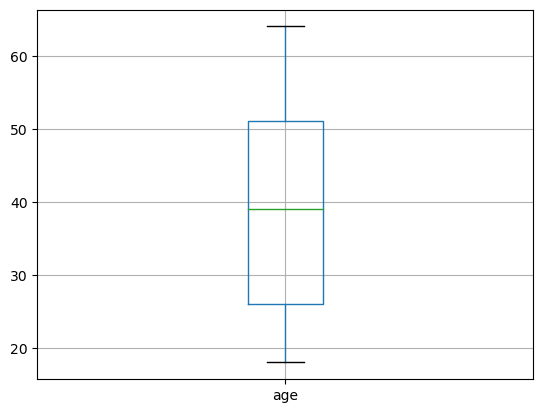

In [31]:
data.boxplot('age')
plt.show()

In [32]:
# Scale the data using roust scaling
import sklearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[['bmi','age']] = sc.fit_transform(data[['bmi','age']])

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.428353,0,-0.457114,0,1,2,16884.92400
1,-1.499381,1,0.500731,1,0,3,1725.55230
2,-0.789099,1,0.375085,3,0,3,4449.46200
3,-0.433959,1,-1.304814,0,0,1,21984.47061
4,-0.504987,1,-0.297201,0,0,1,3866.85520


In [34]:
# Check correaltion
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.009601,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.015191,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.270759,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.005921,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.038912,0.788783
region,-0.009601,0.015191,0.270759,-0.005921,0.038912,1.000000,0.036496
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.036496,1.000000


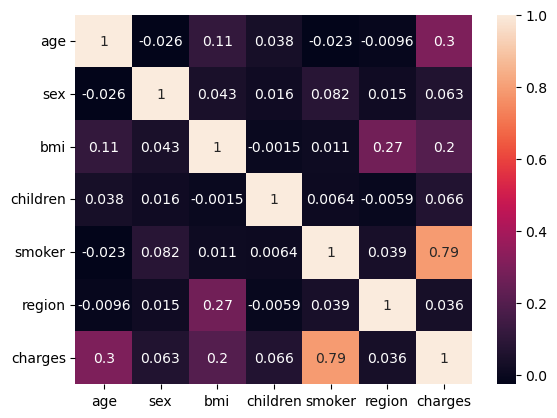

In [36]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
plt.show()

In [37]:
# Check duplicates
data.duplicated().sum()

1435

In [38]:
shape = data.shape
shape

(2772, 7)

In [42]:
# Drop duplicates
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,-1.428353,0,-0.457114,0,1,2,16884.92400
1,-1.499381,1,0.500731,1,0,3,1725.55230
2,-0.789099,1,0.375085,3,0,3,4449.46200
3,-0.433959,1,-1.304814,0,0,1,21984.47061
4,-0.504987,1,-0.297201,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.773520,1,0.043837,3,0,1,10600.54830
1334,-1.499381,0,0.198855,0,0,0,2205.98080
1335,-1.499381,0,1.003314,0,0,3,1629.83350
1336,-1.286297,0,-0.799784,0,0,2,2007.94500


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
X = data.iloc[:,:-1]
y = data.charges

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [54]:
# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Making predictions on the test set
Y_pred = model.predict(X_test)

In [57]:
# Evaluating the model
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

In [58]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 34897594.90630487
R-squared: 0.7627179688303974
Intercept: 8537.652509701682
Coefficients: [ 3.53622275e+03 -1.37297212e+01  2.09558842e+03  5.05837036e+02
  2.38308832e+04 -4.10788407e+02]
